In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
products = pd.read_csv("data_raw/instacart/products.csv")
orders = pd.read_csv("data_raw/instacart/orders.csv")
aisles = pd.read_csv("data_raw/instacart/aisles.csv")
departments = pd.read_csv("data_raw/instacart/departments.csv")
order_product = pd.read_csv("data_raw/instacart/order_products__prior.csv")[["order_id", "product_id"]]
order_nproducts = order_product.groupby("order_id", as_index=False).agg({"product_id":"count"}).rename(columns={"product_id":"different_products"})
orders_prior = orders[orders["order_id"].isin(order_nproducts["order_id"].unique())].merge(order_nproducts, how="left", left_on="order_id", right_on="order_id")
orders_prior["lunes"] = (orders_prior["order_dow"] == 0).astype(int)
orders_prior["martes"] = (orders_prior["order_dow"] == 1).astype(int)
orders_prior["miercoles"] = (orders_prior["order_dow"] == 2).astype(int)
orders_prior["jueves"] = (orders_prior["order_dow"] == 3).astype(int)
orders_prior["viernes"] = (orders_prior["order_dow"] == 4).astype(int)
orders_prior["sabado"] = (orders_prior["order_dow"] == 5).astype(int)
orders_prior["domingo"] = (orders_prior["order_dow"] == 6).astype(int)
orders_prior["am"] = (orders_prior["order_hour_of_day"] <12).astype(int)
orders_prior["pm"] = (orders_prior["order_hour_of_day"] >= 12).astype(int)

In [4]:
print("Cantidad de boletas: " + str(len(order_product)))
print("Cantidad de productos: " + str(len(products["product_id"])))

Cantidad de boletas: 32434489
Cantidad de productos: 49688


In [ ]:
random.seed(12345)
print("Cantidad de clientes originales: ", str(len(orders_prior["user_id"].unique())))
users_sample = random.sample(orders_prior["user_id"].unique().tolist(), 1000)
order_sample = orders_prior[orders_prior["user_id"].isin(users_sample)]["order_id"].unique()
op_sample = order_product[(order_product["order_id"].isin(order_sample))]

print("Cantidad de productos en la muestra: " + str(len(op_sample.product_id.unique())))
op_count = op_sample.groupby(["order_id"], as_index=False).agg({"product_id":"count"}).rename(columns={"product_id":"product_count"})
print("Cantidad de productos comprados: " + str(op_count["product_count"].sum()))

products_sample = products[products["product_id"].isin(op_sample["product_id"].unique())]
orders_sample = orders_prior[orders_prior["order_id"].isin(order_sample)]

Cantidad de clientes originales:  206209


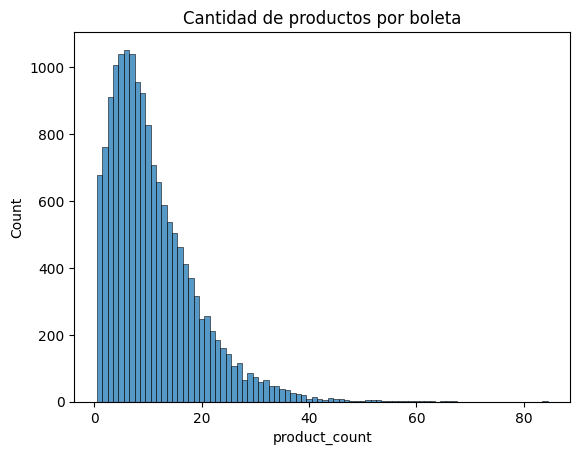

In [25]:
sns.histplot(op_count["product_count"], discrete=True)
plt.title("Cantidad de productos por boleta")
plt.show()

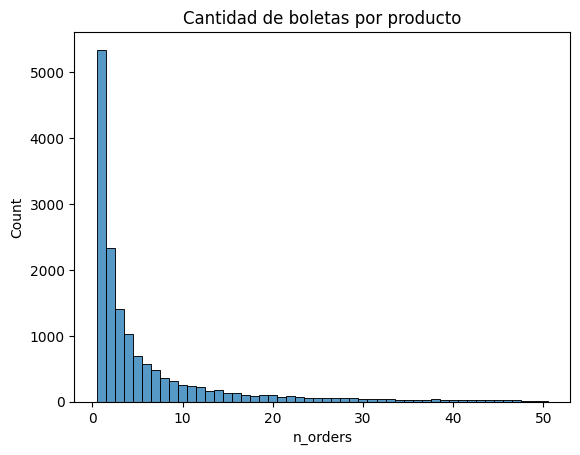

In [26]:
product_baskets = op_sample.groupby(["product_id"], as_index=False).agg({"order_id":"count"}).rename(columns={"order_id":"n_orders"})
product_baskets["relative_orders"] = product_baskets["n_orders"]/len(op_sample.order_id.unique())
product_baskets = product_baskets.merge(right=products, left_on="product_id", right_on="product_id", how="left")
sns.histplot(product_baskets[product_baskets["n_orders"]<=50]["n_orders"], discrete=True)
plt.title("Cantidad de boletas por producto")
plt.show()

<Axes: xlabel='order_count', ylabel='Count'>

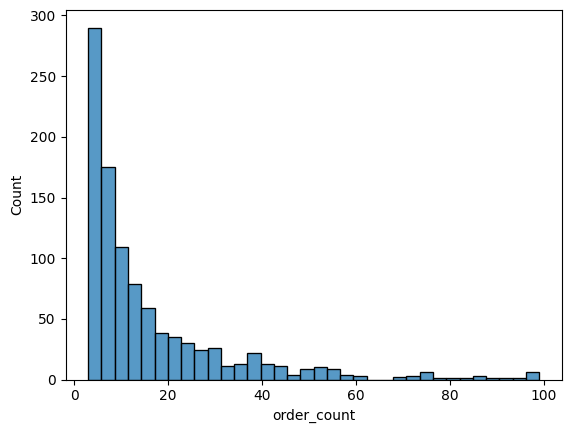

In [29]:
users_sample = orders_sample.groupby("user_id", as_index=False).agg({"order_id":"count","am":"mean", "pm":"mean", "lunes":"mean", "miercoles":"mean", "viernes":"mean", "domingo":"mean"}).rename(columns={"order_id":"order_count"})
sns.histplot(users_sample[users_sample["order_count"]>1]["order_count"])

In [31]:
orders_sample.to_csv("data/instacart/orders_sample.csv")
products_sample.to_csv("data/instacart/products_sample.csv")
op_sample.to_csv("data/instacart/order_product_sample.csv")